## **(A) Setup**

---



#### **Installing Libraries**

---



In [128]:
!pip install langid
!pip install langdetect
!pip install cartopy
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **Importing the Libraries and Dataset**

---



In [129]:
# Importing the pandas library 
import pandas as pd 

# Importing matplotlib library
import matplotlib.pyplot as plt 

# Importing numpy library
import numpy as np 

# Importing seaborn library
import seaborn as sns 

# Applying option to view all the columns
pd.set_option('display.max_columns', None)

# To display Matplotlib plots and charts directly in the notebook interface
%matplotlib inline

# Importing CountVectorizer for sparse matrix/ngrams frequencies
from sklearn.feature_extraction.text import CountVectorizer

# Importing 'nltk' library - Natural Language Toolkit (NLTK) which is a popular library for natural language processing in Python
import nltk

# Importing the "stopwords" corpus from nltk, which is a collection of commonly occurring words that can be excluded from text analysis
from nltk.corpus import stopwords

# Importing the "word_tokenize" function from nltk.tokenize, which is used to split text into individual words or tokens
from nltk.tokenize import word_tokenize

# Importing the "ngrams" function from nltk.util, which is used to generate n-grams (contiguous sequences of n words) from text
from nltk.util import ngrams

# Importing the "langid" library, which is used for language identification of text
import langid

# Importing the "string" library, which provides various string manipulation functions, such as punctuation removal
import string

# Importing the "Counter" class from the "collections" library, which is used to count the frequency of items in a list
from collections import Counter

# Importing the "WordCloud" class and the "STOPWORDS" set from the "wordcloud" library, which is used for creating word clouds from text data
from wordcloud import WordCloud, STOPWORDS

# Importing the "TfidfVectorizer" and "CountVectorizer" classes from the "sklearn.feature_extraction.text" library, which are used for text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Importing the "NMF" and "LatentDirichletAllocation" classes from the "sklearn.decomposition" library, which are used for topic modeling of text data
from sklearn.decomposition import NMF, LatentDirichletAllocation

# Importing the dataset from csv format and storing it in dataframe named 'df'
df = pd.read_csv("/content/starbucks_3k.csv",index_col=0)

# Each row in the dataset represents an individual tweeter user
df.reset_index(drop=True,inplace=True)

In [130]:
df[df['author_id']==14695985]

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count
40,14695985,64581,"U.S., Canada, Puerto Rico",True,229398,5006,2317,9027,1628824337649176582,#Starbucks baristas are inspiring coffee shop workers everywhere to fight for a union! Congrats to the working people at Somerville cafes in Boston who unionized 👏🏼👏🏾👏🏿 #UnionsForAll https://t.co/NhnXULWnbl,2023-02-23 18:29:18,en,9,"[{'text': 'Starbucks', 'indices': [0, 10]}, {'text': 'UnionsForAll', 'indices': [169, 182]}]",38
265,14695985,64581,"U.S., Canada, Puerto Rico",True,229398,5006,2317,9027,1628462154809593865,#GreedyCEOs like @HowardSchultz must be held accountable for trying to silence workers. #Starbucks workers won 200+ unionized stores in a year! That’s massive progress—especially in the face of a rigged system. It’s time for elected officials to help us ensure #UnionsForAll! https://t.co/PjIeiRR1Tm,2023-02-22 18:30:07,en,6,"[{'text': 'GreedyCEOs', 'indices': [0, 11]}, {'text': 'Starbucks', 'indices': [88, 98]}, {'text': 'UnionsForAll', 'indices': [261, 274]}]",32


## **(B) Understanding the Dataset**

In [131]:
# Printing number of rows and columns
print("The starbucks dataset has", df.shape[1], "columns and", df.shape[0], "rows.\n") 

# Checking for duplicated rows
print("The dataset has", df[df.duplicated()].shape[0], "duplicated rows.") 
print()

# Checking for missing (NULL) values in the dataset
print("The number of null values present in the dataset are as follows:\n")
print(df.isna().sum())
print()

# Checking the presence of null values in the dataset and the data-type for each column/feature
df.info()
print()

# View Dataset
df.head()

The starbucks dataset has 15 columns and 1601 rows.

The dataset has 0 duplicated rows.

The number of null values present in the dataset are as follows:

author_id             0
statuses_count        0
location            476
verified              0
followers_count       0
friends_count         0
listed_count          0
favourites_count      0
tweet_id              0
text                  0
created_at            0
lang                  0
retweet_count         0
hashtags              0
favorite_count        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   author_id         1601 non-null   int64 
 1   statuses_count    1601 non-null   int64 
 2   location          1125 non-null   object
 3   verified          1601 non-null   bool  
 4   followers_count   1601 non-null   int64 
 5   friends_count     1601 non-null   int

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,lang,retweet_count,hashtags,favorite_count
0,1107769230181621762,11820,NaN,True,7758,223,102,1224,1628906584741974017,Would you try olive oil in your coffee?👀☕️\n@MarcelClarkeTV #starbucks #oliveoil #coffee https://t.co/xKy3rwXciT,2023-02-23 23:56:08,en,0,"[{'text': 'starbucks', 'indices': [59, 69]}, {'text': 'oliveoil', 'indices': [70, 79]}, {'text': 'coffee', 'indices': [80, 87]}]",4
1,1201299116522950656,2033,NaN,False,4,9,1,95,1628900113740627968,So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #louisvuitton #starbucks #calvinklein: https://t.co/53GN5RVlyH https://t.co/4d9yguPALV,2023-02-23 23:30:25,en,0,"[{'text': 'poshmark', 'indices': [75, 84]}, {'text': 'fashion', 'indices': [85, 93]}, {'text': 'style', 'indices': [94, 100]}, {'text': 'shopmycloset', 'indices': [101, 114]}, {'text': 'louisvuitton', 'indices': [115, 128]}, {'text': 'starbucks', 'indices': [129, 139]}, {'text': 'calvinklein', 'indices': [140, 152]}]",0
2,611175631,780,Los Angeles,False,171,559,3,463,1628897279145914369,#Starbucks\n#giveaway\n#coffee\n#sweepstakes via Enter to win a Starbucks Gift Card (a $100 value) https://t.co/9QuBFVAGt3,2023-02-23 23:19:09,en,0,"[{'text': 'Starbucks', 'indices': [0, 10]}, {'text': 'giveaway', 'indices': [11, 20]}, {'text': 'coffee', 'indices': [21, 28]}, {'text': 'sweepstakes', 'indices': [29, 41]}]",1
3,14571931,15205,NaN,False,5068,519,26,23649,1628895728499101698,"A friend of mine took this picture today at a Starbucks near us. They offer a drink called Velma, an iced pumpkin spice latte with white mocha cold foam. For a limited time only! \n\n#Velma #ScoobyDoo #Starbucks https://t.co/RghaaLn3Mo",2023-02-23 23:12:59,en,14,"[{'text': 'Velma', 'indices': [181, 187]}, {'text': 'ScoobyDoo', 'indices': [188, 198]}, {'text': 'Starbucks', 'indices': [199, 209]}]",66
4,94793143,14127,桃李不言下自成蹊,False,282,240,16,478,1628894089642135552,Do you guys know what day today is? Eat doughnuts right now. #tgif #doughnuts #Starbucks https://t.co/yHpymws32T,2023-02-23 23:06:29,en,0,"[{'text': 'tgif', 'indices': [61, 66]}, {'text': 'doughnuts', 'indices': [67, 77]}, {'text': 'Starbucks', 'indices': [78, 88]}]",1


## **(C) Data Pre-processing**

### **(i) Data Cleaning**

Dropping non-required columns, changing the data type of author_id and tweet_id, cleaning values in location column.

In [132]:
# DATA CLEANING 

# 1) Dropping "lang" and "hashtag" columns

# Checking unique values in "lang" column
# print("Unique values in 'lang' are:",df["lang"].unique())
# Since we have only one category for the "lang" column which is "en", we will drop the "lang" column
df.drop(labels=["lang","hashtags"],axis=1,inplace=True)


# 2) Converting the 'date' column to date-time type
df['created_at'] = pd.to_datetime(df['created_at'])

# 3) Converting the 'author_id' column to string type
df['author_id'] = df['author_id'].astype(str)

# 4) Converting the 'tweet_id' column to string type
df['tweet_id'] = df['tweet_id'].astype(str)

# Printing the location before cleaning
print('\n Location values before cleaning \n') 
print(df.location.sample(n= 10, random_state=13))

# 5) Cleaning Location Column

# Storing the original locations in new column called 'Actual_location'
df['Actual_location'] = df['location']

# Replacing the null values in "location" column by "Unknown"
df.loc[df['location'].isna(),'location'] = "Unknown"

# Defining a function "is_english" that takes a single argument "text"
def is_english(text):
  # This is a conditional statement that checks if all the characters in the text have an ASCII value less than 128, indicating that the text is in English
  if all(ord(c) < 128 for c in text):
    # If the text is in English, the function returns the text
    return text
  # If the text is not in English, the function returns the string "Unknown"    
  else:
    return "Unknown"

# Defining a function "filter_string" that takes a single argument "s"
def filter_string(s):
   # Checking for irrelevant characters in the location name to identify them as junk values and return "Unkown" for such junk values
    if any(c.isdigit() or c == '#' or c == '+' or c == '@' or c == '&' or c == 'OR' or c == '/' or c == '.' for c in s):
        return "Unknown"
   # If there are no irrelevant characters in the location name, then it will return back the same string
    else:
        return s

# Assigning the result of calling the "is_english" function to the 'location' column of the 'df' DataFrame
df['location'] = df['location'].apply(is_english)

# Assigning the result of calling the "filter_string" function to the 'location' column of the 'df' DataFrame
df['location'] = df['location'].apply(filter_string)

# Creating a dictionary called "mapping" that maps some abbreviated country names to their full names to maintain consistency in names
mapping = {'UK':'United Kingdom','USA':'United States'}

# Applying a lambda function to the 'location' column of the 'df' DataFrame to map the names using mapping dictionary. If not, it leaves the value unchanged
df['location'] =  df['location'].apply(lambda x: mapping[x] if x in mapping.keys() else x )

# Printing the number of unique locations in the 'location' column and their frequency count respectively
#print('\n Number of unique locations is',df['location'].nunique())
#print('\n The frequency count distribution for each unique location is as follows: \n',df['location'].value_counts())

# Printing an array of unique values in the 'location' column
#print('\n The names of unique location after cleaning the location column are:',df['location'].unique())
# Printing the location before cleaning
print('\n\n Location values after cleaning \n') 
print(df.location.sample(n= 10, random_state=13))


 Location values before cleaning 

912                         Thailand
1393                        Maryland
486                              NaN
812             Halifax, Nova Scotia
980                    East Haven CT
1579                             NaN
67                               NaN
1592                        Michigan
5       5hrs 18min 😜 NW of The Big 🍎
362                    Nashville, TN
Name: location, dtype: object


 Location values after cleaning 

912                 Thailand
1393                Maryland
486                  Unknown
812     Halifax, Nova Scotia
980            East Haven CT
1579                 Unknown
67                   Unknown
1592                Michigan
5                    Unknown
362            Nashville, TN
Name: location, dtype: object


### **(ii) Feature engineering**

Creating new features: hashtags, user_mentions, text_nchars, text_nwords, City, Country, Hour and date. 

In [133]:
# Importing the "re" module which is a regular expression library
import re

# Define find_hashtags function to extract hashtags from the tweets
def find_hashtags(tweet):
    # "findall" method searches for patterns in the tweet
    # The regular expression pattern used in this function matches hashtags that start with "#" and contain only letters, digits, hyphens, and underscores
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

# Define find_users function to extract users from the tweets
def find_users(tweet):
    # "findall" method searches for patterns in the tweet
    # The regular expression pattern used in this function matches users that start with "@" and contain only letters, digits, hyphens, and underscores
    return re.findall('(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

# Creating a new column that stores hashtags by applying the "find_hashtags" function to the "text" column
df['Hashtags'] = df.text.apply(find_hashtags)

# Creating a new column that stores users by applying the "find_users" function to the "text" column
df['User_mentions'] = df.text.apply(find_users)

# Creating a new column "text_nchars" that stores the length (no. of characters) of the tweet
df["text_nchars"] = df["text"].str.len()

# Store number of words in tweets in new column
df["text_nwords"] = df["text"].apply(lambda x: len(str(x).split(" ")))

# Creating new features for geo-spatial analysis
df[['City', 'Country']] = df['location'].str.split(',', 1, expand=True)

# Creating new features "hour" and "date" for temporal analysis
df['hour'] = pd.DatetimeIndex(df['created_at']).hour
df['date'] = pd.DatetimeIndex(df['created_at']).date

# Exporting the dataset to csv file for using it in Tableau for Geospatial Analysis
df.to_csv("Cleaned_Location_File.csv")

# View Dataset
df[['Hashtags','User_mentions','text_nchars','text_nwords','City','Country','hour','date']].head()

<ipython-input-133-ca1d228cbc5d>:29: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['City', 'Country']] = df['location'].str.split(',', 1, expand=True)


,Hashtags,User_mentions,text_nchars,text_nwords,City,Country,hour,date
0,"[#starbucks, #oliveoil, #coffee]",[@MarcelClarkeTV],111,12,Unknown,None,23,2023-02-23
1,"[#poshmark, #fashion, #style, #shopmycloset, #louisvuitton, #starbucks, #calvinklein]",[@Poshmarkapp],201,24,Unknown,None,23,2023-02-23
2,"[#Starbucks, #giveaway, #coffee, #sweepstakes]",[],119,13,Los Angeles,None,23,2023-02-23
3,"[#Velma, #ScoobyDoo, #Starbucks]",[],233,38,Unknown,None,23,2023-02-23
4,"[#tgif, #doughnuts, #Starbucks]",[],112,16,Unknown,None,23,2023-02-23


## **(D) Exploratory Analysis**

### **(i) Basic Exploration**

Exploring timeline of the tweets, number of unique users and unique locations, average word length and average character length of tweets.

In [134]:
# Exploring the timeline of the tweets in the dataset
print("The latest tweet made in the dataset was at",np.max(df.created_at),"\n")
print("The earliest tweet made in the dataset was at",np.min(df.created_at),"\n")

# Printing number of unique users in the dataset
print("The number of unique users in the dataset is",df['author_id'].nunique(),"\n")

# Printing number of unique location in the dataset
print("The number of unique location in the dataset is",df['location'].nunique(),"\n")

# Average word length of all tweets
print("The average word length of all tweets is",round(np.mean(df['text_nwords'])),"\n")

# Average character length of all tweets
print("The average character length of all tweets is",round(np.mean(df['text_nchars'])))

# Number of unique users from location having maximum tweets
print("\n The number of users from location having maximum tweets are: ")
df[df['location']=='Ajmer, India']['author_id'].nunique()

# Calculating number of tweets based on location
location_count = df.location.value_counts()
location_count.head()

The latest tweet made in the dataset was at 2023-03-03 16:38:52 

The earliest tweet made in the dataset was at 2023-02-22 00:05:33 

The number of unique users in the dataset is 1268 

The number of unique location in the dataset is 531 

The average word length of all tweets is 21 

The average character length of all tweets is 168

 The number of users from location having maximum tweets are: 


Unknown          599
Ajmer, India      97
United States     48
Thailand          35
Houston, TX       15
Name: location, dtype: int64

### **(ii) Statistical summary of numeric features**

Describing descriptive statistics such as mean, median, standard deviation and max-min.

In [135]:
# Extracting numeric features from dataset for analysis
numeric =  df.select_dtypes(include=['float64', 'int64'])

# Changing the display format for floating-point numbers to 2 decimal places
pd.options.display.float_format = '{:.0f}'.format

# Statistical Summary
numeric.describe()

,statuses_count,followers_count,friends_count,listed_count,favourites_count,retweet_count,favorite_count,text_nchars,text_nwords,hour
count,1601,1601,1601,1601,1601,1601,1601,1601,1601,1601
mean,90318,11221,1357,95,12064,1,2,168,21,12
std,328166,128478,3554,461,35988,19,28,67,10,7
min,1,0,0,0,0,0,0,25,1,0
25%,1096,49,65,0,34,0,0,113,13,6
50%,6355,363,355,4,958,0,0,169,21,13
75%,34326,1478,1357,23,7429,0,1,213,26,17
max,2929390,4325940,67829,9412,540285,775,1051,351,55,23


### **(iii) Histograms and Boxplots**

Visualising distribution of numeric features

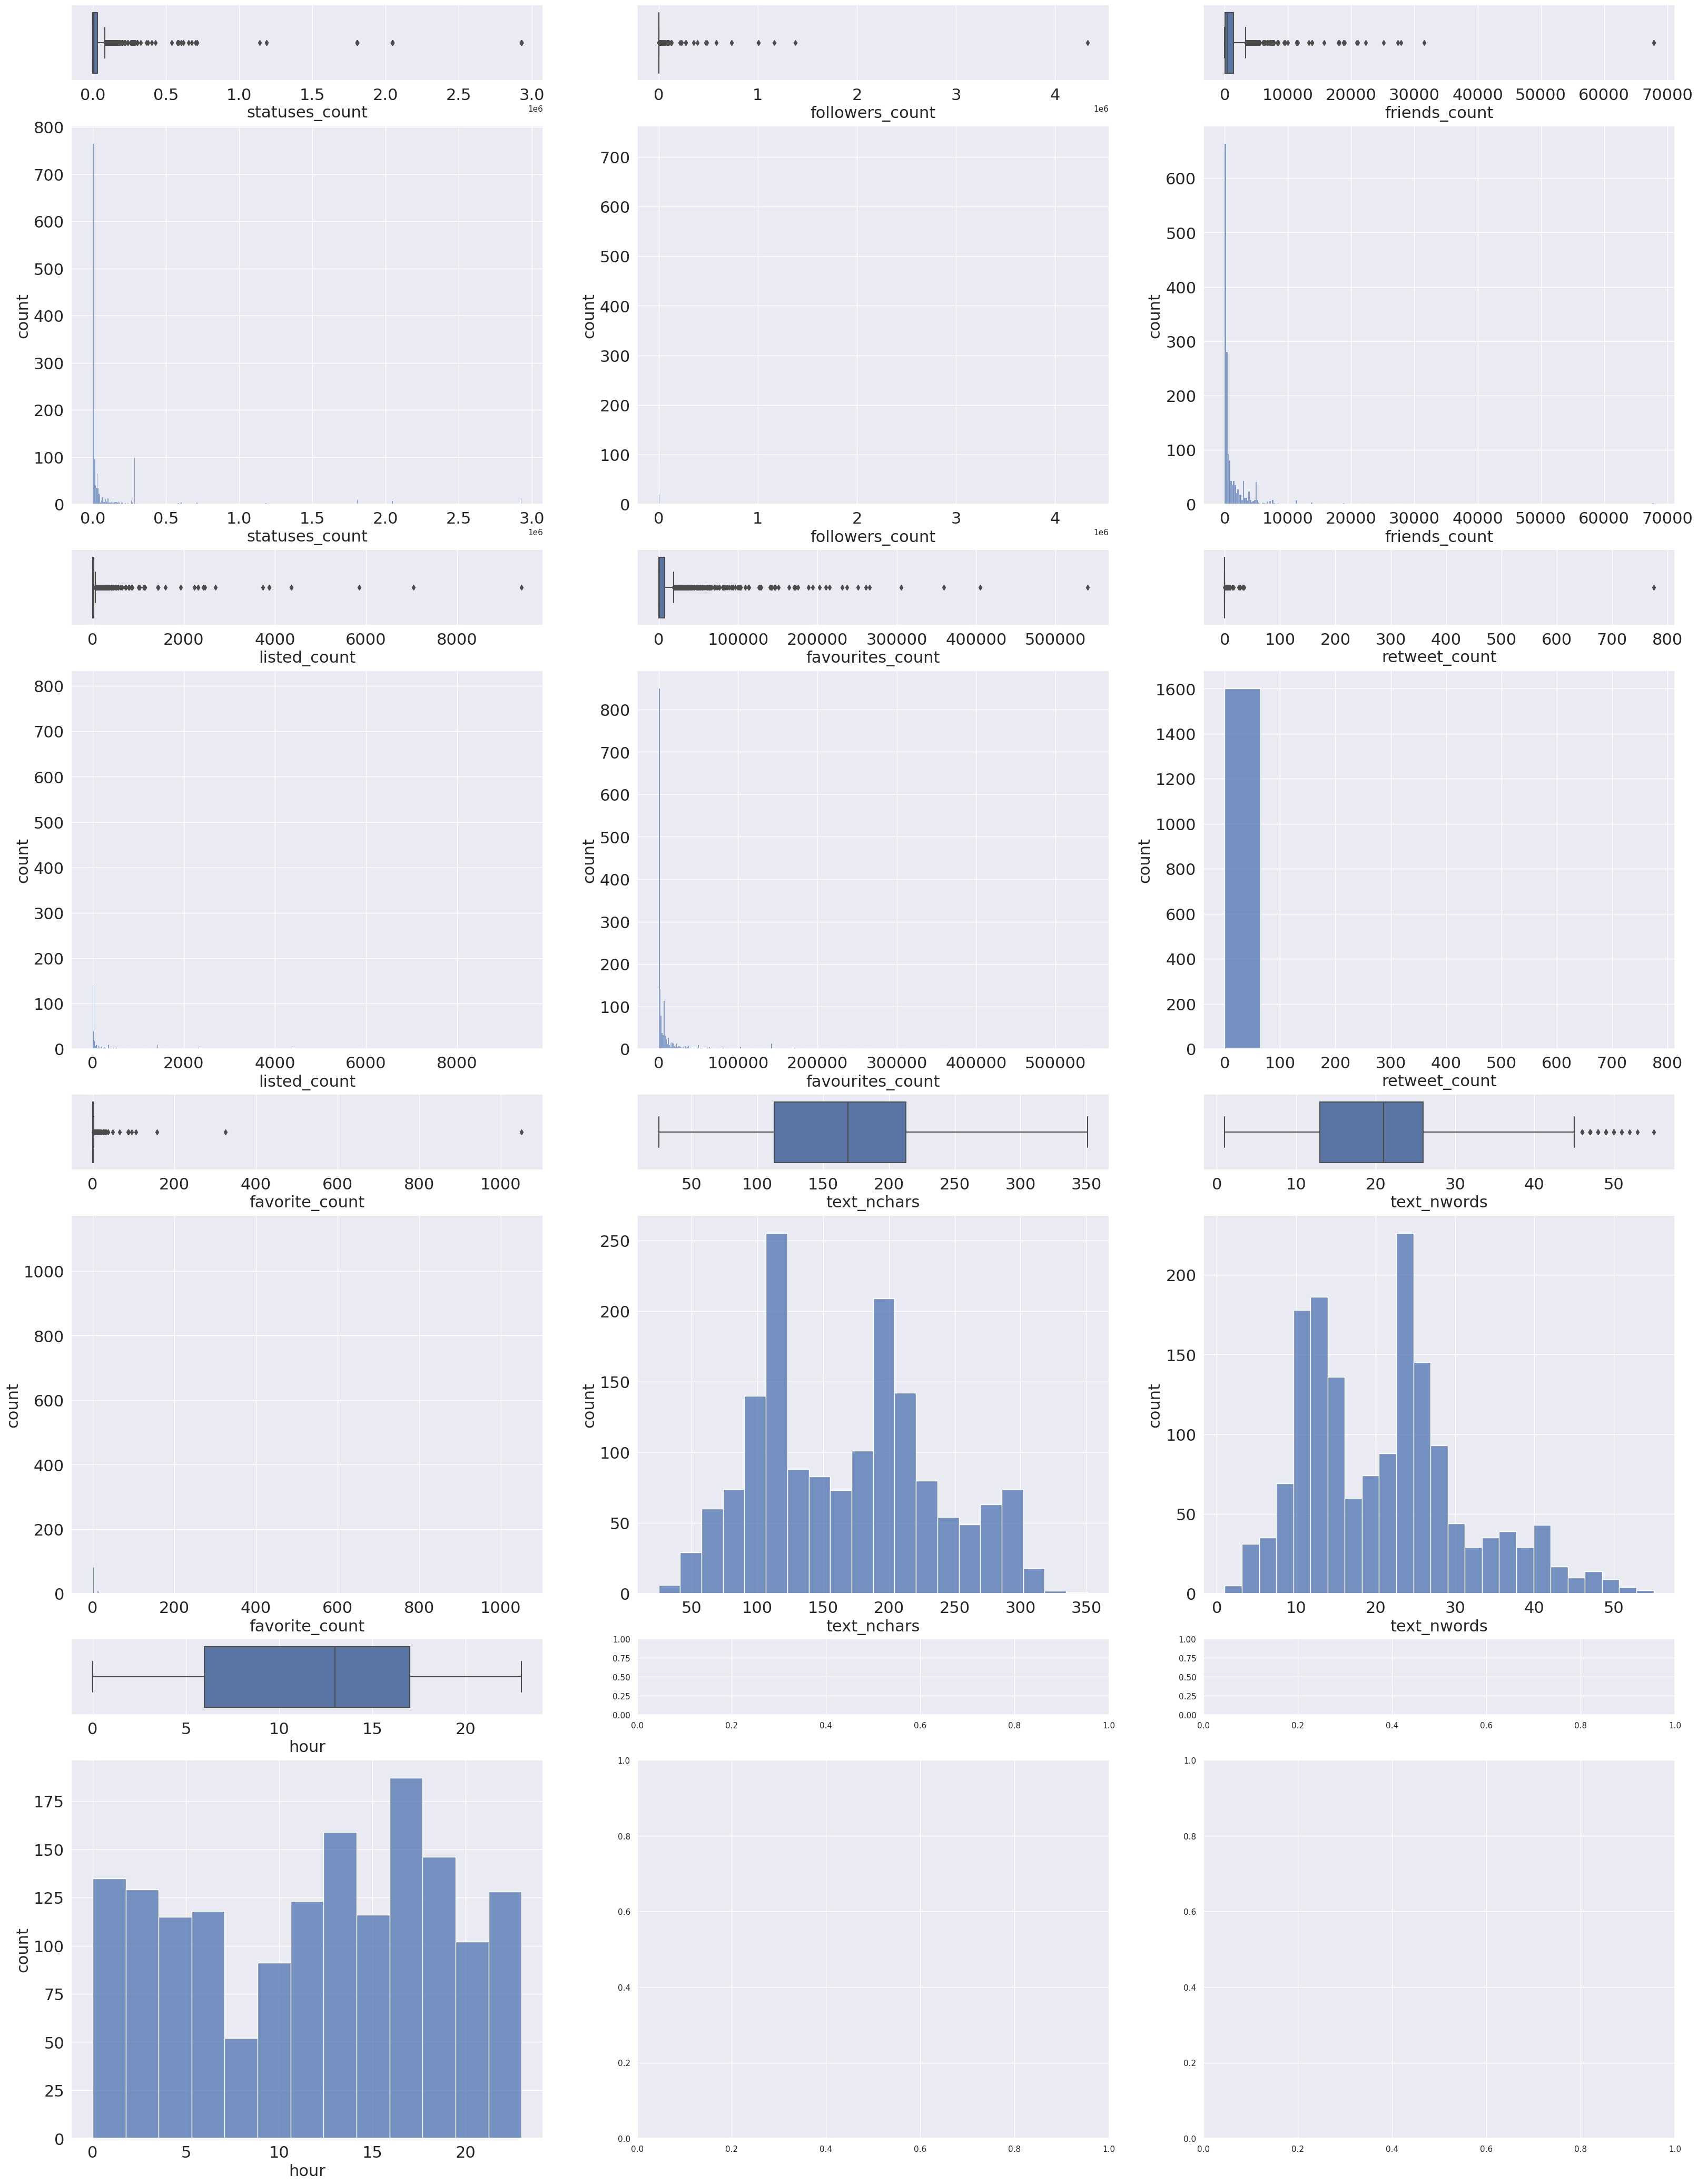

In [136]:
# Defining the overall figure size for all subplots
plt.rcParams['figure.figsize'] = (35,50)

# Setting up a grey background for the subplots
sns.set(style="darkgrid")

# Defining Ratio of boxplot to histogram
a = np.tile([1,5],4)

# Creating a figure and a set of subplots, the 'axes' stores an array of Axes objects
fig,axes = plt.subplots(ncols=3,nrows=8,gridspec_kw={'height_ratios':a})

# # Hiding the last 2 subplot because we have only 7 subplots to be plotted
# axes[-1, -1].axis('off')
# axes[-1, -2].axis('off')
# axes[-2, -2].axis('off')
# axes[-2, -1].axis('off')

# Storing axes objects in the list, in order to traverse using for loop
axes_list = []
for j in axes.flat:
  axes_list.append(j)

# Defining list1 to store the subplots index where we want to plot the box plots i.e 1st row, 3rd row, 5th row, etc
list1 = [0,1,2,6,7,8,12,13,14,18,19,20,24,25,26,30,31,32,36,37,38,42,43,44]

# Run for loop across the columns
for i in range(len(numeric.columns)):
  j = list1[i]
  # Plotting box plot in the odd no. of row for ith column of input
  sns.boxplot(x=numeric.iloc[:,i], ax=axes_list[j])
  axes_list[j].set_xlabel(numeric.columns[i],fontsize=22)
  axes_list[j].tick_params(axis='x', labelsize=22)
  # Plotting histogram plot in the even no. of row for ith column of input
  sns.histplot(data=numeric.iloc[:,i], ax=axes_list[j+3])
  axes_list[j+3].set_xlabel(numeric.columns[i],fontsize=22)
  axes_list[j+3].set_ylabel('count',fontsize=22)
  axes_list[j+3].tick_params(axis='x', labelsize=22)
  axes_list[j+3].tick_params(axis='y', labelsize=22)

### **(iv) Timeseries Analysis**

Analysing the volume of tweets with respect to time, i.e. hour and day.

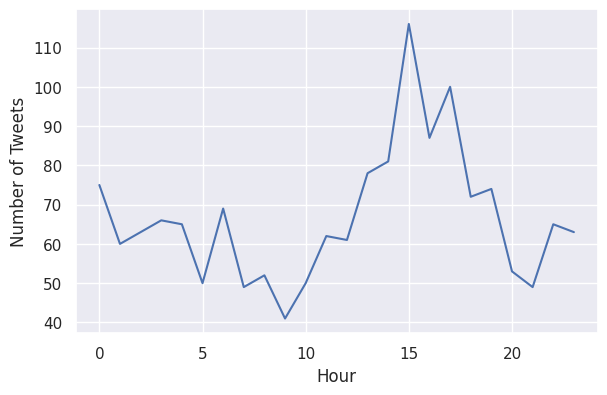

In [137]:

# 1) Number of tweets by time of the day

# group dataframe by hour and count number of tweets
hourly_tweet_count = df.groupby('hour').count()['tweet_id']

plt.figure(figsize=(6, 4)) 

# plot line chart
plt.plot(hourly_tweet_count.index, hourly_tweet_count.values)

# Provide X-label
plt.xlabel('Hour')

# Provide Y-label
plt.ylabel('Number of Tweets')

# View plot
plt.show()

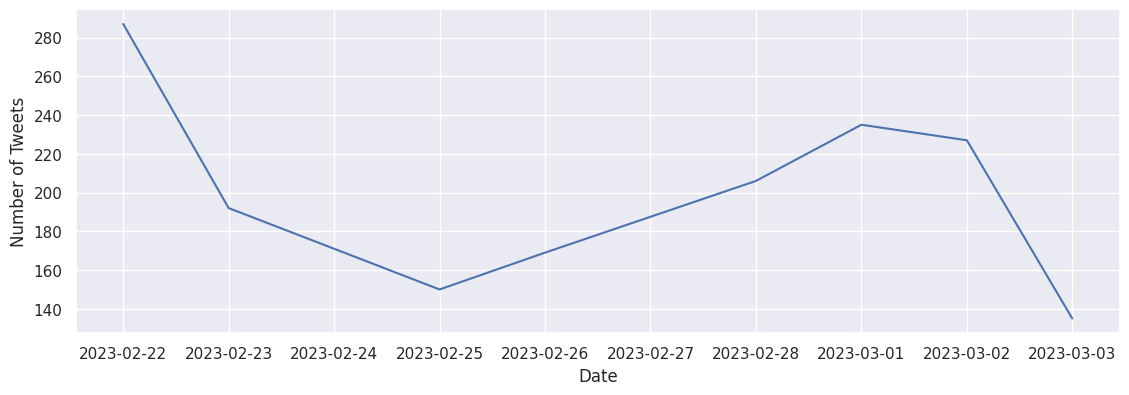

In [138]:
# 2) Number of tweets by date

# group dataframe by hour and count number of tweets
daily_tweet_count = df.groupby('date').count()['tweet_id']

plt.figure(figsize=(12, 4)) 

# plot line chart
plt.plot(daily_tweet_count.index, daily_tweet_count.values)

# Provide X-label
plt.xlabel('Date')

# Provide Y-label
plt.ylabel('Number of Tweets')

# View plot
plt.show()

### **(v) Geospatial Analysis**

Analysing the volume of tweets per location by retriving the coordinated of tweet locations.
* Note: More accurate geospatial analysis has been done in Tableau. Please refer Tableau file that has been submitted as part of of submission. 

In [139]:
# Assigning the result of calling the "value_counts" method on the 'location' column of the 'df' DataFrame to a variable named "locs"
locs = df['location'].value_counts()

# Printing the subset of "locs" that only contains the locations with 10 or more occurrences
print("The top locations with most number of tweets are:")
print(locs[locs >= 10])

locs = locs[locs >= 10]
# Converting "locs" into a list of index values (i.e., location names)
locs = list(locs.index)

# Removing the 'Unknown' value from the "locs" list as there will be no co-ordinates that can be fetched for it
locs.remove('Unknown')

The top locations with most number of tweets are:
Unknown           599
Ajmer, India       97
United States      48
Thailand           35
Houston, TX        15
Atlanta, GA        14
Canada             12
United Kingdom     11
Name: location, dtype: int64


In [140]:

# Importing the Nominatim class from the geopy.geocoders module
from geopy.geocoders import Nominatim

# note that user_agent is a random name
geolocator = Nominatim(user_agent='twitter-analysis-cl')

# Creating a list called "geolocated" by applying a lambda function to each element in the "locs" list
# The lambda function calls the "geocode" method of a geolocator object and passes it the element in the "locs" list as an argument
# Geocode method returns a location, the lambda function returns a list containing the element in the "locs" list and the latitude and longitude coordinates of the location
geolocated = list(map(lambda x: [x,geolocator.geocode(x,timeout=10)[1] if geolocator.geocode(x,timeout=10) else None],locs))

# Converting the "geolocated" list into a pandas DataFrame
geolocated = pd.DataFrame(geolocated)

# Assigning column names to the "geolocated" DataFrame
geolocated.columns = ['locat','latlong']

# Creating a new column called "lat" in the "geolocated" DataFrame by applying a lambda function to the "latlong" column. The lambda function returns the first element of the tuple
geolocated['lat'] = geolocated.latlong.apply(lambda x: x[0])

# Creating a new column called "lon" in the "geolocated" DataFrame by applying a lambda function to the "latlong" column. The lambda function returns the second element of the tuple
geolocated['lon'] = geolocated.latlong.apply(lambda x: x[1])

# Dropping the "latlong" column from the "geolocated" DataFrame
geolocated.drop('latlong',axis=1, inplace=True)

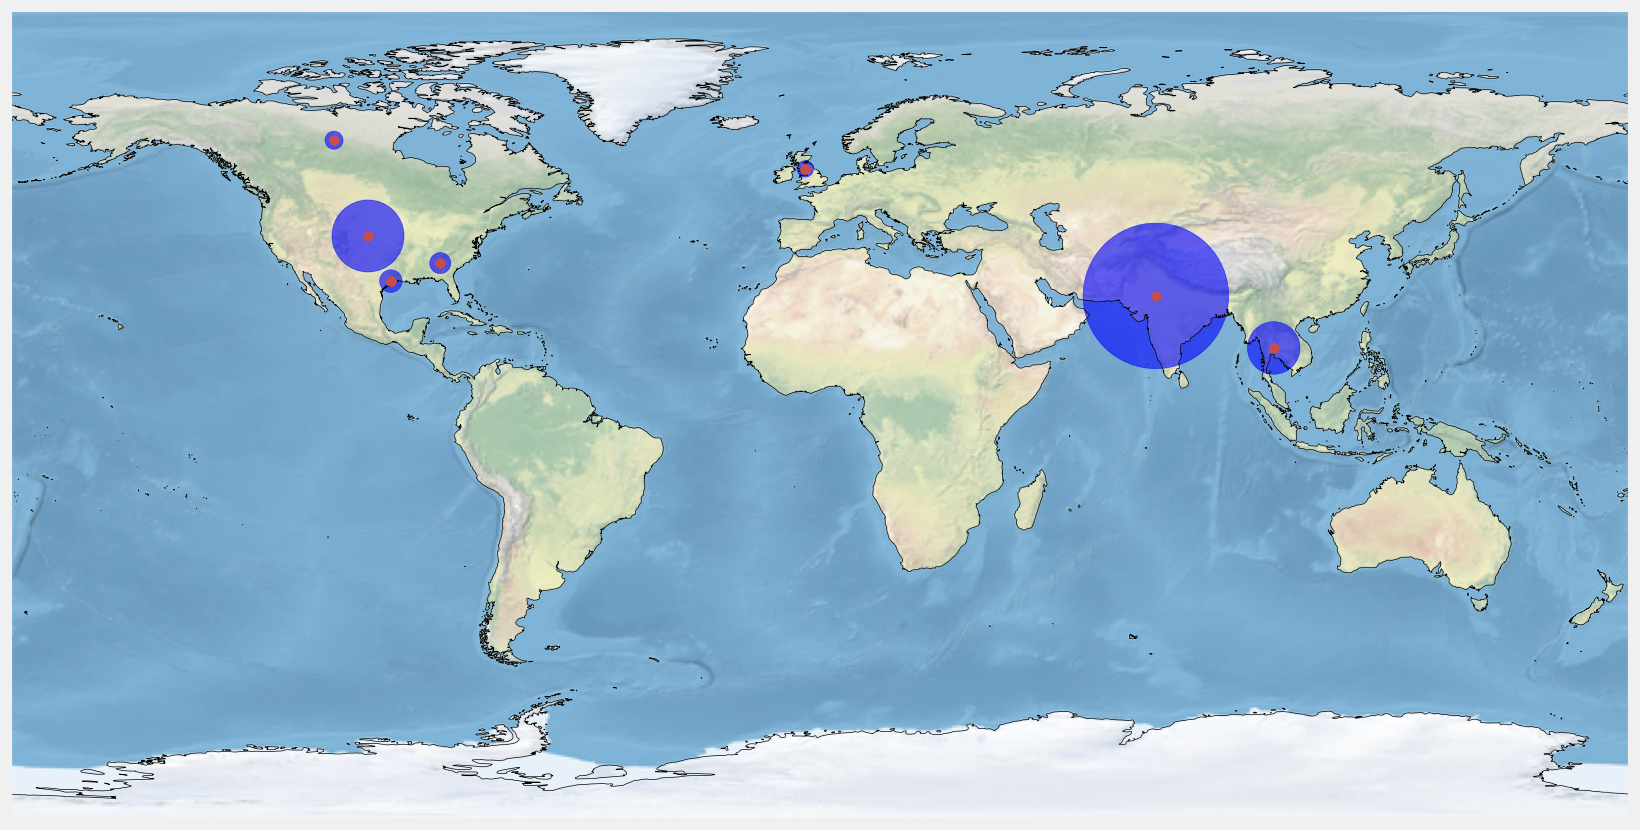

In [141]:
mapdata = pd.merge(df,geolocated, how='inner', left_on='location', right_on='locat')
locations = mapdata.groupby(by=['locat','lat','lon'])\
       .count()['created_at']\
       .sort_values(ascending=False)

import cartopy.crs as ccrs
from matplotlib.patches import Circle

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = (20, 10)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
# plot individual locations                                                                                                       
ax.plot(mapdata.lon, mapdata.lat, 'ro', transform=ccrs.PlateCarree())
# add coastlines for reference                                                                                                
ax.coastlines(resolution='50m')
ax.set_global()
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())


def get_radius(freq):
    return freq/6
# plot count of tweets per location
for i,x in locations.items():
    ax.add_patch(Circle(xy=[i[2], i[1]], radius=get_radius(x), color='blue', alpha=0.6, transform=ccrs.PlateCarree()))
plt.show()

## **(E) Text Analytics**

### **(i) Hashtag Analysis**

Identifying most frequent hashtags used in tweets.

Total hashtags:  6853

 Unique hashtags:  2181


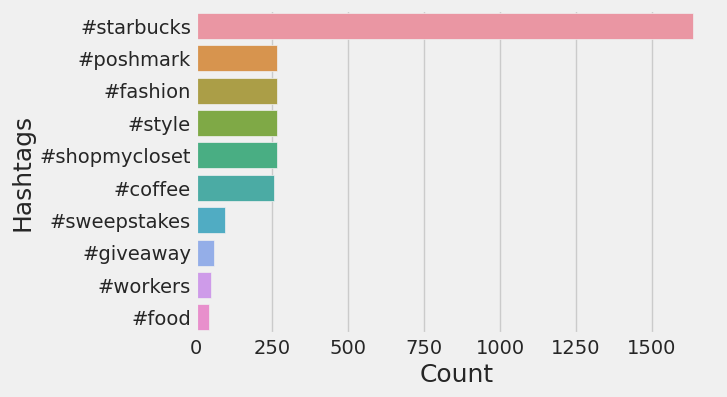

In [142]:
# Creating a list called "hashtag_list" using the "Hashtags" column of the dataframe. Its done by using to_list() method
hashtag_list = df['Hashtags'].to_list()

# Flatten the list of lists into a single list of hashtags
flattened_hashtags = []
for sublist in hashtag_list:
    for item in sublist:
        flattened_hashtags.append(item.lower())

# Create a new DataFrame with the flattened list of hashtags
flat_hashtags_df = pd.DataFrame({'Hashtags': flattened_hashtags})

# Printing Total and Unique Hashtags
print("Total hashtags: ", len(flat_hashtags_df['Hashtags']))
print("\n Unique hashtags: ", len(flat_hashtags_df['Hashtags'].unique()))

# Set the size of the plot
plt.figure(figsize=(6, 4))

# Creating a horizontal bar plot of the top 20 hashtags
top_hashtags = flat_hashtags_df['Hashtags'].value_counts()[:10]
ax = sns.barplot(x=top_hashtags, y=top_hashtags.index, orient='h')

# Set the font size for the axis labels
ax.tick_params(labelsize=14)

# Printing X and Y label for the plot
plt.xlabel('Count', fontsize=18)
plt.ylabel('Hashtags', fontsize=18)

# Display the plot
plt.show()


### **(ii) Users mentions** 

Identifying most frequent user-mentions used in tweets.

Total user_mentions:  901
Unique user_mentions:  345


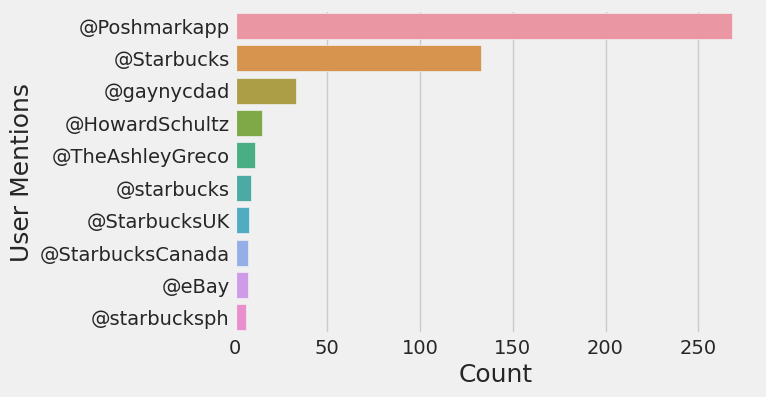

In [143]:
# Creating a list called "hashtag_list" using the "Hashtags" column of the dataframe. Its done by using to_list() method
users_mentions_list = df['User_mentions'].to_list()

# Flatten the list of lists into a single list of hashtags
flattened_users_mentions = []
for sublist in users_mentions_list:
    for item in sublist:
        flattened_users_mentions.append(item)

# Create a new DataFrame with the flattened list of hashtags
flat_users_mentions_df = pd.DataFrame({'User_mentions': flattened_users_mentions})


print("Total user_mentions: ", len(flat_users_mentions_df['User_mentions']))
print("Unique user_mentions: ", len(flat_users_mentions_df['User_mentions'].unique()))

# Set the size of the plot
plt.figure(figsize=(6, 4))

# Creating a horizontal bar plot of the top 20 hashtags
top_user_mentions = flat_users_mentions_df['User_mentions'].value_counts()[:10]
ax = sns.barplot(x=top_user_mentions, y=top_user_mentions.index, orient='h')

# Set the font size for the axis labels
ax.tick_params(labelsize=14)

plt.xlabel('Count', fontsize=18)
plt.ylabel('User Mentions', fontsize=18)

# Display the plot
plt.show()


### **(iii) Text Cleaning**

Cleaning text for text analytics techniques.

In [144]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#define a function to clean up the tweets. input - text field of all #the rows, output - cleaned text 
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub('@[^\s@]+', '', txt)
    # Remove hashtags
    txt = re.sub('#[^\s@]+', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    #remove amp
    txt = re.sub(r'&amp;', '', txt)
    #remove new lines
    txt = re.sub(r'\n', ' ', txt)
    # removing numbers
    txt = re.sub('[0-9]+', '', txt)
    # Remove punctuation marks
    txt = re.sub(r'[^\w\s]', '', txt)
    # Remove non-English words
    english_text = []
    for word in re.findall(r'\b\w+\b', txt):
        if langid.classify(word)[0] == "en":
            english_text.append(word)

    english_text = " ".join(english_text)

    return english_text

# Define the text analytics function
def text_preprocessing(text):
    # Stripping
    text = text.strip()

    # Case folding
    text = text.lower()

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Stop words removal
    stop_words = stopwords.words('english')
    tokens = [token for token in tokens if not token in stop_words]

    # Applying lemmatizer to  reduce words to their base form by taking into account their context and part of speech 
    lm = nltk.WordNetLemmatizer()
    tokens = [lm.lemmatize(token) for token in tokens]

    # Stemming
    # stemmer = nltk.PorterStemmer()
    # tokens = [stemmer.stem(token) for token in tokens]

    return ' '.join(tokens)

# Apply the text analytics function to the text column
df['Cleaned_text'] = df['text'].apply(cleanUpTweet)

df['Cleaned_text'] = df['Cleaned_text'].apply(text_preprocessing)

# set the maximum width for output to 1000 characters
pd.set_option('display.max_colwidth', 1000)

# Displaying original text
print('\n Original text \n')
print(df.text.sample(n = 5, random_state = 27))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



 Original text 

590                                                                                                                                                                    https://t.co/Z8UBFFmdnz #Starbucks Tea Cup https://t.co/9MJlxEd0FU
827     Why Lawmakers Aren’t Rushing to Police A.I.\n\n#Activision #Airbnb #United #OpenAI #Circle #Consumer #Binance #Democratic #Coinbase #European #Federal #Food #HK #Instacart #Neuralink #Starbucks #Senate https://t.co/rufq3xhdPx
1225                                                                                                                          Yummy.. Olive 🫒 oil  coffee ☕️… ..😏\n.\n#Coffee #Beans #Oil #Italy #StarBucks \n….. https://t.co/lRSKSyu7Zf
1528                                                                                                                          $10 Starbucks Gift Card Giveaway! @Starbucks #Starbucks via @gaynycdad #sweepstakes https://t.co/xEJCNYEtHQ
1350                                        So

In [145]:
# Displaying cleaned text
print('\n Cleaned text \n')
print(df.Cleaned_text.sample(n = 5, random_state = 27))


 Cleaned text 

590                              tea cup
827     lawmaker arent rushing police ai
1225              yummy olive oil coffee
1528             starbucks gift card via
1350     good share check item im loving
Name: Cleaned_text, dtype: object


### **(iv) Evaluating bigrams and trigrams**

To get better sense of what is being talked about Starbucks.

In [146]:
# Tokenize the text into words
df['Tokens'] = df['Cleaned_text'].apply(lambda x: x.split())

# Create bigrams and trigrams for each row
df['Unigrams'] = df['Tokens'].apply(lambda x: list(ngrams(x, 1)))
df['Bigrams'] = df['Tokens'].apply(lambda x: list(ngrams(x, 2)))
df['Trigrams'] = df['Tokens'].apply(lambda x: list(ngrams(x, 3)))

# Compute the most common bigrams and trigrams across all rows
unigram_counter = Counter([item for sublist in df['Unigrams'] for item in sublist])
bigram_counter = Counter([item for sublist in df['Bigrams'] for item in sublist])
trigram_counter = Counter([item for sublist in df['Trigrams'] for item in sublist])

# Print the 10 most common bigrams and trigrams
print("Most common bigrams: ", unigram_counter.most_common(10))
print("Most common bigrams: ", bigram_counter.most_common(10))
print("Most common trigrams: ", trigram_counter.most_common(10))

Most common bigrams:  [(('starbucks',), 593), (('coffee',), 321), (('good',), 309), (('check',), 290), (('im',), 285), (('share',), 275), (('item',), 275), (('loving',), 269), (('drink',), 186), (('olive',), 180)]
Most common bigrams:  [(('good', 'share'), 268), (('share', 'check'), 268), (('check', 'item'), 268), (('item', 'im'), 268), (('im', 'loving'), 268), (('olive', 'oil'), 145), (('gift', 'card'), 95), (('starbucks', 'gift'), 93), (('oil', 'coffee'), 61), (('enter', 'win'), 59)]
Most common trigrams:  [(('good', 'share', 'check'), 268), (('share', 'check', 'item'), 268), (('check', 'item', 'im'), 268), (('item', 'im', 'loving'), 268), (('starbucks', 'gift', 'card'), 93), (('olive', 'oil', 'coffee'), 59), (('win', 'starbucks', 'gift'), 59), (('via', 'enter', 'win'), 58), (('enter', 'win', 'starbucks'), 58), (('gift', 'card', 'value'), 58)]


### **(v) Sentiment Analysis**

Analysing the sentiments of the tweets if they are positve, negative or neutral.

In [147]:
# Importing the dataset 'vader_lexicon' for getting the dictionary which maps lexical features to emotion intensities known as sentiment scores
# Downloading the VADER (Valence Aware Dictionary and sentiment Reasoner) lexicon from NLTK's server using the nltk.download() function
# The VADER lexicon is a pre-trained sentiment analysis tool that provides a score for the sentiment (positive, negative, or neutral) of a given text
nltk.download('vader_lexicon')

# Importing SentimentIntensityAnalyzer class from the nltk.sentiment.vader module to perform sentiment analysis on text using the VADER lexicon
from nltk.sentiment.vader import SentimentIntensityAnalyzer
for index, row in df['Cleaned_text'].items():
  # Using polarity_scores() method to get the sentiment scores of a text
  # The score is returned in the form of a dictionary
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        df.loc[index, "Sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        df.loc[index, "Sentiment"] = "positive"
    else:
        df.loc[index, "Sentiment"] = "neutral"
        
    df.loc[index, 'neg'] = score['neg']
    df.loc[index, 'neu'] = score['neu']
    df.loc[index, 'pos'] = score['pos']
    df.loc[index, 'compound'] = score['compound']
    
print(df[['Cleaned_text','Sentiment','neg','neu','pos','compound']].sample(n = 5, random_state = 31))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                                                                Cleaned_text  \
1422                                                                         good share check item im loving   
754                                              ready go paris hoenn tour lovely sister daugther nekocookie   
1366  remembered today also smoothy although never tried banana flavor favorite made single banana came size   
379                                                     coffee taste olive oil starbucks new oleato beverage   
812                      snow day mean day mystical healing property music al jarreau magic starbucks coffee   

     Sentiment  neg  neu  pos  compound  
1422  positive    0    0    1         1  
754   positive    0    1    0         1  
1366  positive    0    1    0         0  
379    neutral    0    1    0         0  
812    neutral    0    1    0         0  


#### Segregating Sentiments

In [148]:
# Segregating the tweets into "positive", "negative" and "neutral"

#create new data frames for all sentiments
tweet_neg = df[df["Sentiment"] == "negative"]
tweet_neu = df[df["Sentiment"] == "neutral"]
tweet_pos = df[df["Sentiment"] == "positive"]

#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100
pos_per = calc_percentage(len(tweet_pos), len(df))
neg_per = calc_percentage(len(tweet_neg), len(df))
neu_per = calc_percentage(len(tweet_neu), len(df))

# Printing the percent of sentiment types
print("positive:  {}%".format(format(pos_per, '.1f')))
print("\n negative:  {}%".format(format(neg_per, '.1f')))
print("\n neutral: {}%".format(format(neu_per, '.1f')))

# printing first 5 positive tweets
print("\n\nPositive tweets:")
print(tweet_pos['text'].head(5))

# printing first 5 negative tweets
print("\n\nNegative tweets:")
print(tweet_neg['text'].head(5))

positive:  52.3%

 negative:  13.7%

 neutral: 33.9%


Positive tweets:
1                                      So good I had to share! Check out all the items I'm loving on @Poshmarkapp #poshmark #fashion #style #shopmycloset #louisvuitton #starbucks #calvinklein: https://t.co/53GN5RVlyH https://t.co/4d9yguPALV
2                                                                                                                     #Starbucks\n#giveaway\n#coffee\n#sweepstakes via Enter to win a Starbucks Gift Card (a $100 value) https://t.co/9QuBFVAGt3
3    A friend of mine took this picture today at a Starbucks near us. They offer a drink called Velma, an iced pumpkin spice latte with white mocha cold foam. For a limited time only! \n\n#Velma #ScoobyDoo #Starbucks https://t.co/RghaaLn3Mo
5            @EatThisNotThat If you deliver to my house, I'll tip you.  If I drove there, you hand my coffee cup/meal to me and I drive away - no tip for you!  No store should shame ppl into tipping them. 

#### Visualisation

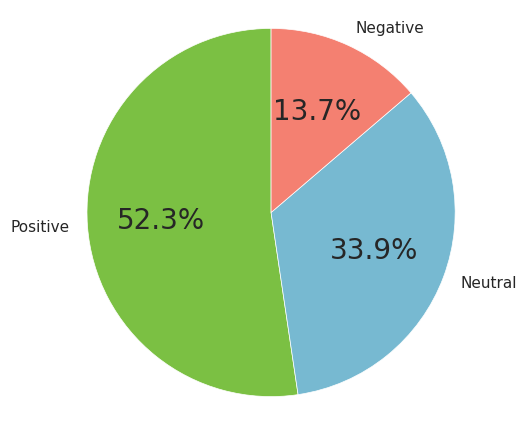

In [149]:
# 1) Pie Chart

# set plot style to whitegrid
sns.set_style("whitegrid")

labels = ['Positive', 'Neutral', 'Negative']
sizes = [len(tweet_pos), len(tweet_neu), len(tweet_neg)]


colors = ['#7bc043', '#77b9d1', '#f48071']

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,wedgeprops=dict(edgecolor='w'))

# plt.title('Sentiment Analysis of Tweets')
plt.axis('equal')

plt.show()

The following is the word cloud for overall tweets 



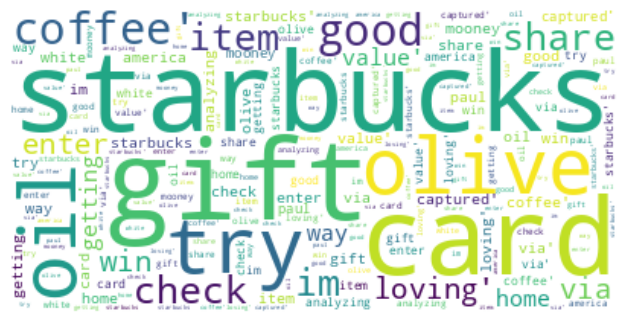


 The following is the word cloud for positive sentiments 



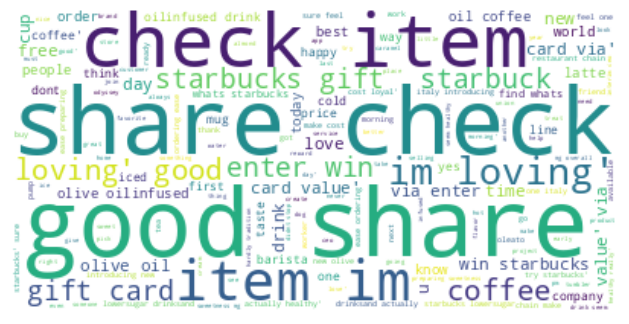


 The following is the word cloud for negative sentiments 



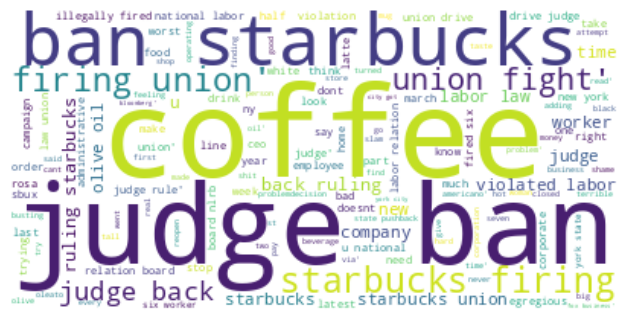

In [150]:
# 2) Creating Word Clouds

#function to create word cloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white", max_words = 3000, stopwords = stopwords, repeat = True)
    wc.generate(str(text))
    plt.figure(figsize = (7,7))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

print('The following is the word cloud for overall tweets \n')
create_wordcloud(df["Cleaned_text"].values)

print('\n The following is the word cloud for positive sentiments \n')
#word cloud for positive sentiments
create_wordcloud(tweet_pos["Cleaned_text"].values)


print('\n The following is the word cloud for negative sentiments \n')
#wordcloud for negative sentimenst
create_wordcloud(tweet_neg["Cleaned_text"].values)

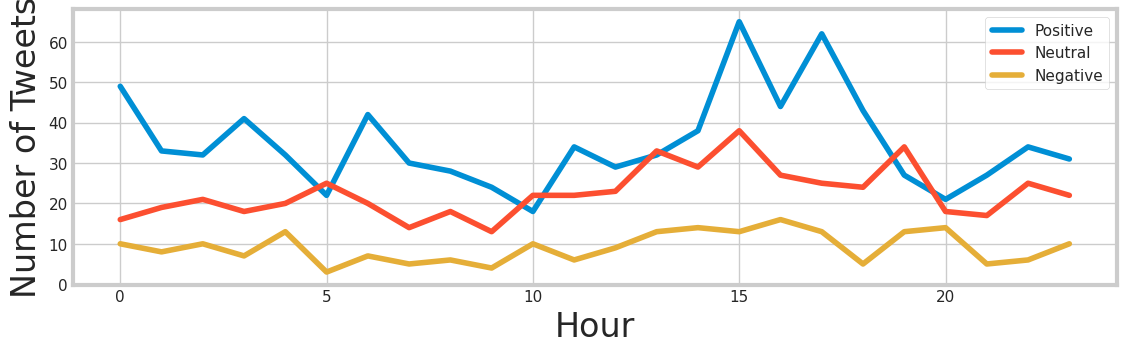

In [151]:
# 3) Visualising sentiments over time

# group dataframe by hour and sentiment and count number of tweets
hourly_sentiment_count = df.groupby(['hour', 'Sentiment']).count()['tweet_id']

plt.figure(figsize=(12, 3.4))

# set plot style to whitegrid
sns.set_style("whitegrid")

# plot line chart for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    hourly_tweet_count = hourly_sentiment_count.loc[:, sentiment]
    plt.plot(hourly_tweet_count.index, hourly_tweet_count.values, label=sentiment.title())

# Increase the font size
plt.rcParams.update({'font.size': 16})

plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()


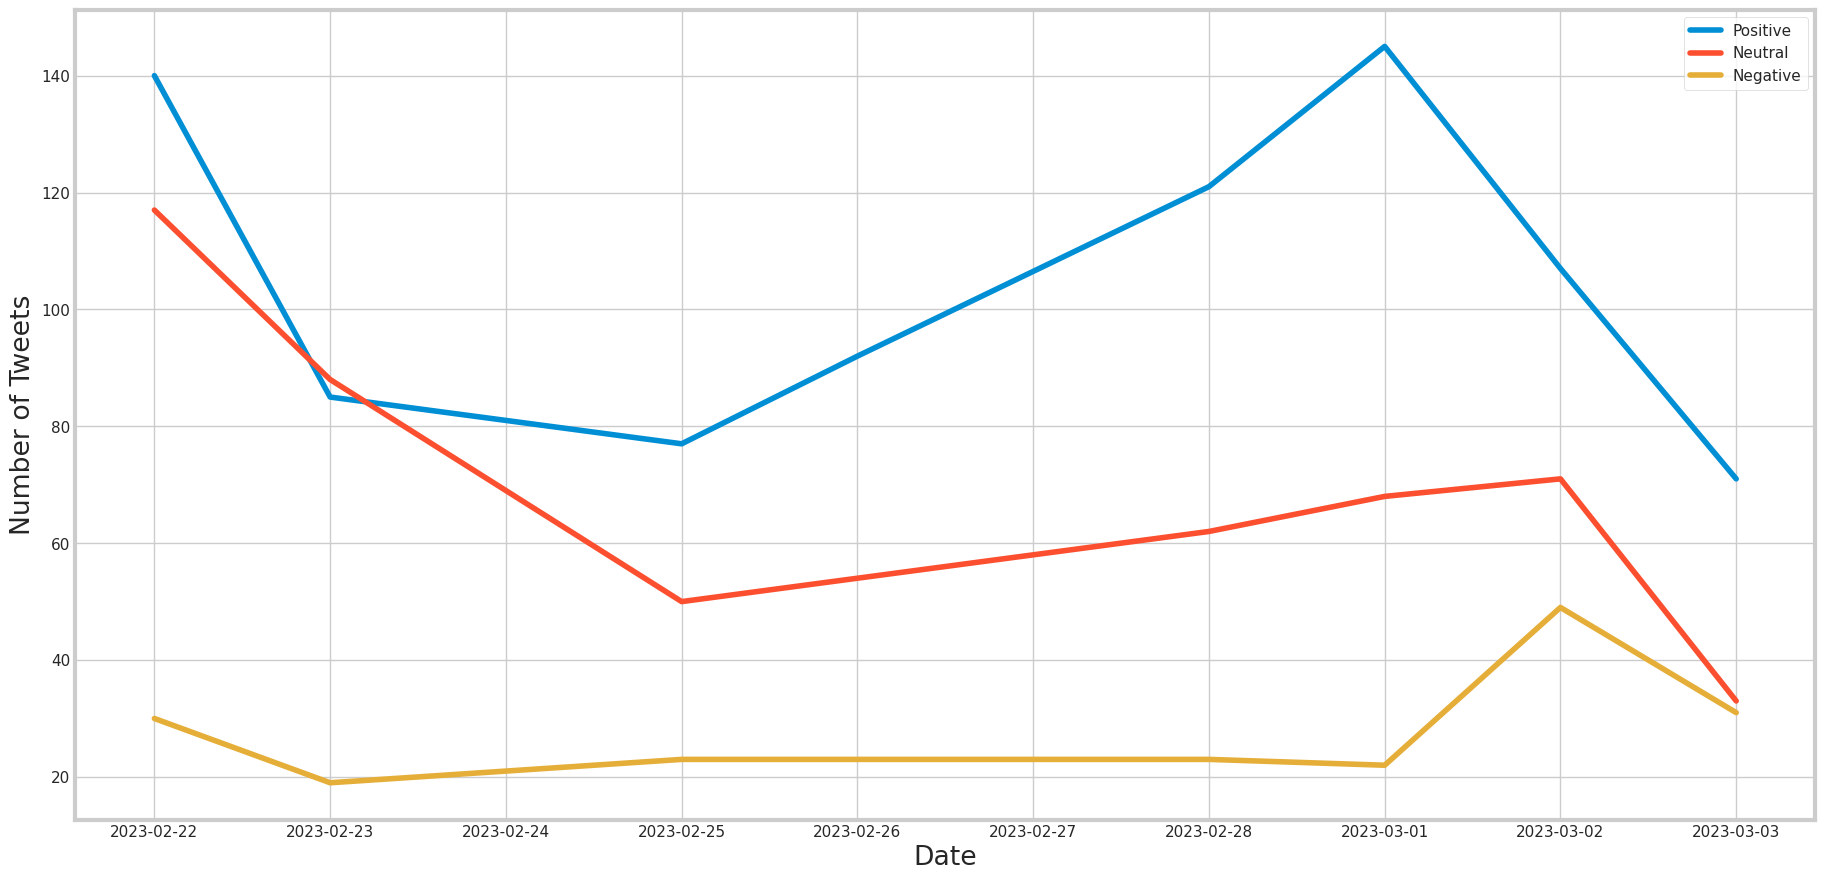

In [152]:
# group dataframe by hour and sentiment and count number of tweets
daily_sentiment_count = df.groupby(['date', 'Sentiment']).count()['tweet_id']

# plot line chart for each sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    daily_tweet_count = daily_sentiment_count.loc[:, sentiment]
    plt.plot(daily_tweet_count.index, daily_tweet_count.values, label=sentiment.title())

plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.show()


### **(vi) Topic Modelling**

Analying the topics being discussed by users using dimentionality reduction techniques.

In [153]:
# Setting the number of features (i.e. unique words) to be used in the vectorization process to 1000
no_features = 1000

# NMF is able to use tf-idf
# Converting the text data into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features
# The max_df parameter sets the maximum document frequency for a term to be included, min_df sets the minimum document frequency for a term to be included, max_features limits the number of features to be used
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features)

# Applying the TF-IDF vectorization to the cleaned text data and saving the resulting matrix of features to the variable tfidf
tfidf = tfidf_vectorizer.fit_transform(df.Cleaned_text)

# Saving the names of the features (i.e., the words that were used to create the matrix) to the variable tfidf_feature_names
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Converting the text data into a matrix of raw term counts
# LDA can only use raw term counts because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features)

# Applying the Count vectorization to the cleaned text data 
tf = tf_vectorizer.fit_transform(df.Cleaned_text)

# Saving the names of the features (i.e., the words that were used to create the matrix) to the variable tf_feature_names
tf_feature_names = tf_vectorizer.get_feature_names_out()

# Setting the number of topics that we want to extract from the text data
no_topics = 4


# The NMF algorithm factorizes the input matrix into two lower-rank matrices that represent the topic-term and document-topic distributions
# The fit() method is then called to fit the model to the input data represented by the tfidf matrix of term frequencies
nmf = NMF(n_components=no_topics, random_state=1, l1_ratio=.5, init='nndsvd').fit(tfidf)


# The LDA algorithm models the topic-word and document-topic distributions as probability distributions over latent topics
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

# Defining a function named display_topics that takes three arguments: the topic model (model), a list of feature names (feature_names), and the number of top words to display (no_top_words)
def display_topics(model, feature_names, no_top_words):
    # Loops through each topic in the model, where topic_idx is the index of the topic and topic is the corresponding array of word weights
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        # Printing out the top no_top_words words for the current topic. It does this by first sorting the array of word weights in descending order using argsort(), then selecting the top no_top_words words using array slicing, and finally using a list comprehension to look up the corresponding feature names and join them together into a single string separated by spaces.
        print (" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))


no_top_words = 10

print("Topics identified using NMF \n")
# Calling the display_topics function to print out the top words for each topic identified by the NMF algorithm, using the list of feature names tfidf_feature_names
display_topics(nmf, tfidf_feature_names, no_top_words)

print()

print("Topics identified using LDA \n")
# Calling the display_topics function again to print out the top words for each topic identified by the LDA algorithm, using the list of feature names tf_feature_names
display_topics(lda, tf_feature_names, no_top_words)


Topics identified using NMF 

Topic 0:
loving share item im check good morning video post day
Topic 1:
card gift via enter win value starbucks dm cherry mug
Topic 2:
drink olive coffee starbucks oil recalled italy new oilinfused line
Topic 3:
union judge starbucks ban firing fight ruling back labor law

Topics identified using LDA 

Topic 0:
starbucks drink get dm coffee union back recalled ceo cherry
Topic 1:
starbucks via gift card enter win value coffee flavored morning
Topic 2:
starbucks judge union labor like worker ban firing tea time
Topic 3:
good check im share item loving coffee olive oil starbucks


## **(F) Identifying Micro-influencer for the company**

### **(i) Creating user level dataset**

Transforming tweet-level dataset to user-level dataset.

In [170]:
# Each row represents a twitter user
# Reducing the granularity from tweet level information to user level information
twitter_users = df.groupby(by=["author_id","verified","location","Actual_location"],as_index=False).aggregate({
    'tweet_id': 'count',
    'statuses_count': 'mean',
    'followers_count': 'mean',
    'friends_count': 'mean',
    'listed_count': 'mean',
    'favourites_count': 'mean',
    'retweet_count': 'mean',
    'favorite_count': 'mean',
    'compound': 'mean'
}).rename(columns={
    'tweet_id': 'No. of Tweets',
    'statuses_count':'Avg. statuses_count',
    'followers_count': 'Avg. followers_count',
    'friends_count': 'Avg. friends_count',
    'listed_count': 'Avg. listed_count',
    'favourites_count': 'Avg. favourites_count',
    'retweet_count': 'Avg. retweet_count',
    'favorite_count': 'Avg. favorite_count',
    'compound': 'Avg. sentiment score of tweets'
    })

# Changing the display format for floating-point numbers to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

twitter_users = pd.DataFrame(twitter_users)

# The dataset 'twitter_users' have each row representing a user, hence the number of rows is equal to number of unique users
print("The shape of the dataset is",twitter_users.shape)


twitter_users.head()

The shape of the dataset is (866, 13)


,author_id,verified,location,Actual_location,No. of Tweets,Avg. statuses_count,Avg. followers_count,Avg. friends_count,Avg. listed_count,Avg. favourites_count,Avg. retweet_count,Avg. favorite_count,Avg. sentiment score of tweets
0,1009536615600066561,False,"Miami, FL","Miami, FL",1,11729.00,62.00,45.00,0.00,3776.00,0.00,0.00,0.00
1,1013545957454012417,False,"California, USA","California, USA",1,138879.00,2777.00,4979.00,3.00,88233.00,1.00,1.00,0.40
2,1013808600,False,Toronto,Toronto,1,126450.00,11303.00,8402.00,260.00,4281.00,2.00,0.00,-0.27
3,101808963,False,"Los Angeles, CA","Los Angeles, CA",1,122494.00,1597.00,2156.00,47.00,175166.00,0.00,2.00,0.00
4,102115526,False,Toronto,Toronto,1,759.00,239.00,640.00,17.00,126.00,0.00,0.00,0.81


### **(ii) Defining the benchmark for selecting micro-influencer**

Selecting criteria such as verified user, positive sentiment score, favourite count, retweet count, followers count and status count to select a micro-influencer.

In [171]:
# Criterias based on the actual tweet dataset
print("\n The average positive sentiment for the entire dataset is ",(df['Sentiment'].value_counts()['positive']/len(df['Sentiment']))*100,"percent")

print("\n The average retweet for each tweet in the dataset is ",np.mean(df['retweet_count']))

print("\n The average likes on each tweet count in the dataset is ",np.mean(df['favorite_count']))

print("\n The number of verified users are ",len(twitter_users[twitter_users['verified']==True]))

print("\n The average followers count of the users are ",np.mean(twitter_users['Avg. followers_count']))

print("\n The average statuses count of the users are ",np.mean(twitter_users['Avg. statuses_count']))

print("\n The average sentiment scores of the users are ",np.mean(twitter_users['Avg. sentiment score of tweets']))


 The average positive sentiment for the entire dataset is  52.3422860712055 percent

 The average retweet for each tweet in the dataset is  0.8450968144909432

 The average likes on each tweet count in the dataset is  2.3947532792004997

 The number of verified users are  45

 The average followers count of the users are  10448.493071593533

 The average statuses count of the users are  41977.63384205138

 The average sentiment scores of the users are  0.2898724807959977


In [177]:
# Filtering the twitter users based on the selected criteria


# Assigning the original twitter_users DataFrame to a new variable called filtered_users
filtered_users = twitter_users

# Printing the number of total users present before applying any filtering
print("The number of total users present before applying any filtering are",len(twitter_users))

# Filtering the users based on their average sentiment score of tweets and selecting only those users whose average sentiment score is greater than the mean sentiment score of all the users
filtered_users = filtered_users[filtered_users['Avg. sentiment score of tweets']>np.mean(twitter_users['Avg. sentiment score of tweets'])]

# Printing the number of users selected after filtering based on sentiment score
print("\n The number of users selected after filtering based on sentiment score are",len(filtered_users))

# Filtering the users based on their verification status and selecting only those users who are verified
filtered_users = filtered_users[filtered_users['verified']==True]

# Printing the number of users selected after filtering based on verification status
print("\n The number of users selected after filtering based on whether the user is verified or not are",len(filtered_users))

# Filtering the users based on their average follower count and selecting only those users whose average follower count is greater than or equal to the mean average follower count of all the users
filtered_users = filtered_users[filtered_users['Avg. followers_count']>=np.mean(twitter_users['Avg. followers_count'])]

# Printing the number of users selected after filtering based on followers count
print("\n The number of users selected after filtering based on followers count are",len(filtered_users))

# Filtering the users based on their number of tweets and selecting only those users whose number of tweets is greater than or equal to the mean number of tweets of all the users
filtered_users = filtered_users[filtered_users['No. of Tweets']>=np.mean(twitter_users['No. of Tweets'])]

# Printing the number of users selected after filtering based on number of tweets count
print("\n The number of users selected after filtering based on number of tweets count are",len(filtered_users))

# Filtering the users based on their average favorite count and selecting only those users whose average favorite count is greater than or equal to the mean average favorite count of all the users
filtered_users = filtered_users[filtered_users['Avg. favorite_count']>=np.mean(twitter_users['Avg. favorite_count'])]

# Printing the number of users selected after filtering based on favorite count
print("\n The number of users selected after filtering based on favorite count are",len(filtered_users))

# Filtering the users based on their average statuses count and selecting only those users whose average statuses count is greater than or equal to the mean average statuses count of all the users
filtered_users = filtered_users[filtered_users['Avg. statuses_count']>=np.mean(twitter_users['Avg. statuses_count'])]

# Printing the number of users selected after filtering based on statuses count
print("\n The number of users selected after filtering based on statuses count are",len(filtered_users))

# Printing the average sentiment score of the users
print("\n The average sentiment score of the users is",np.mean(twitter_users['Avg. sentiment score of tweets']))

# Printing the prospective micro-influencers after filtering based on selected criterias
print("The prospectiev micro-influencers after filtering based on selected criterias: ")
filtered_users.head()

The number of total users present before applying any filtering are 866

 The number of users selected after filtering based on sentiment score are 447

 The number of users selected after filtering based on whether the user is verified or not are 19

 The number of users selected after filtering based on followers count are 8

 The number of users selected after filtering based on number of tweets count are 2

 The number of users selected after filtering based on favorite count are 2

 The number of users selected after filtering based on statuses count are 1

 The average sentiment score of the users is 0.2898724807959977
The prospectiev micro-influencers after filtering based on selected criterias: 


,author_id,verified,location,Actual_location,No. of Tweets,Avg. statuses_count,Avg. followers_count,Avg. friends_count,Avg. listed_count,Avg. favourites_count,Avg. retweet_count,Avg. favorite_count,Avg. sentiment score of tweets
197,14695985,True,Unknown,"U.S., Canada, Puerto Rico",2,64581.00,229398.00,5006.00,2317.00,9027.00,7.50,35.00,0.60


In [179]:
# Displaying tweet level information for the prospective micro-influencer
df[df['author_id']=='14695985']

,author_id,statuses_count,location,verified,followers_count,friends_count,listed_count,favourites_count,tweet_id,text,created_at,retweet_count,favorite_count,Actual_location,Hashtags,User_mentions,text_nchars,text_nwords,City,Country,hour,date,Cleaned_text,Tokens,Unigrams,Bigrams,Trigrams,Sentiment,neg,neu,pos,compound
40,14695985,64581,Unknown,True,229398,5006,2317,9027,1628824337649176582,#Starbucks baristas are inspiring coffee shop workers everywhere to fight for a union! Congrats to the working people at Somerville cafes in Boston who unionized 👏🏼👏🏾👏🏿 #UnionsForAll https://t.co/NhnXULWnbl,2023-02-23 18:29:18,9,38,"U.S., Canada, Puerto Rico","[#Starbucks, #UnionsForAll]",[],206,28,Unknown,None,18,2023-02-23,inspiring coffee shop worker everywhere fight union congrats working people cafe,"[inspiring, coffee, shop, worker, everywhere, fight, union, congrats, working, people, cafe]","[(inspiring,), (coffee,), (shop,), (worker,), (everywhere,), (fight,), (union,), (congrats,), (working,), (people,), (cafe,)]","[(inspiring, coffee), (coffee, shop), (shop, worker), (worker, everywhere), (everywhere, fight), (fight, union), (union, congrats), (congrats, working), (working, people), (people, cafe)]","[(inspiring, coffee, shop), (coffee, shop, worker), (shop, worker, everywhere), (worker, everywhere, fight), (everywhere, fight, union), (fight, union, congrats), (union, congrats, working), (congrats, working, people), (working, people, cafe)]",positive,0.15,0.48,0.37,0.56
265,14695985,64581,Unknown,True,229398,5006,2317,9027,1628462154809593865,#GreedyCEOs like @HowardSchultz must be held accountable for trying to silence workers. #Starbucks workers won 200+ unionized stores in a year! That’s massive progress—especially in the face of a rigged system. It’s time for elected officials to help us ensure #UnionsForAll! https://t.co/PjIeiRR1Tm,2023-02-22 18:30:07,6,32,"U.S., Canada, Puerto Rico","[#GreedyCEOs, #Starbucks, #UnionsForAll]",[@HowardSchultz],299,42,Unknown,None,18,2023-02-22,like must held accountable trying silence worker worker year thats massive progressespecially face rigged system time elected help u ensure,"[like, must, held, accountable, trying, silence, worker, worker, year, thats, massive, progressespecially, face, rigged, system, time, elected, help, u, ensure]","[(like,), (must,), (held,), (accountable,), (trying,), (silence,), (worker,), (worker,), (year,), (thats,), (massive,), (progressespecially,), (face,), (rigged,), (system,), (time,), (elected,), (help,), (u,), (ensure,)]","[(like, must), (must, held), (held, accountable), (accountable, trying), (trying, silence), (silence, worker), (worker, worker), (worker, year), (year, thats), (thats, massive), (massive, progressespecially), (progressespecially, face), (face, rigged), (rigged, system), (system, time), (time, elected), (elected, help), (help, u), (u, ensure)]","[(like, must, held), (must, held, accountable), (held, accountable, trying), (accountable, trying, silence), (trying, silence, worker), (silence, worker, worker), (worker, worker, year), (worker, year, thats), (year, thats, massive), (thats, massive, progressespecially), (massive, progressespecially, face), (progressespecially, face, rigged), (face, rigged, system), (rigged, system, time), (system, time, elected), (time, elected, help), (elected, help, u), (help, u, ensure)]",positive,0.10,0.59,0.31,0.65
